In [2]:
import numpy as np
import matplotlib as plt
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import clear_output

In [3]:
#https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb

### 1. Losowo wygenerowany zbiór danych

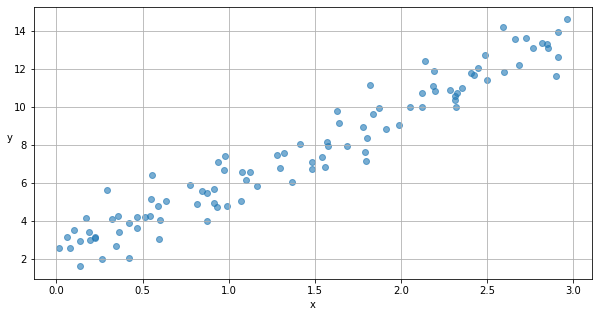

In [4]:
np.random.seed(42)
m = 100
X = 3 * np.random.rand(m,1) 
y = 2 + 4 * X + np.random.randn(m,1)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, alpha = 0.6)
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.grid()
plt.show()

#### Równanie normalne

$$
\hat{O} = (X^TX)^{-1}X^Ty
$$


$\hat{O}$ - wartość wektora  [a,b] która minimalizuje funkcję kosztu

X - macierz wartości

y - wektor wartości docelowych 



nie wymaga iteracji i działa dobrze na niewielkich zbiorach danych



In [5]:
#dodanie do X kolumny jedynek aby uwzględnić wyraz wolny b
ones = np.ones((100,1))
X_b = np.c_[ones, X] # np_c - łączenie dwóch macierzy wzdłuż kolumn
#obliczanie współczynników: linalg.inv - odwrtotność macierzy
O = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print(f'wyznaczone wartości współczynnika kierunkowego a: {round(O[1][0],3)}')
print(f'wyznaczone wartości wyrazu wolnego b: {round(O[0][0],3)}')

wyznaczone wartości współczynnika kierunkowego a: 3.847
wyznaczone wartości wyrazu wolnego b: 2.215


### 2. Funkcja kosztu - błąd średniokwadratowy
 
Funkcja kosztu MSE:
 
$$
J(a, b) = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$
 
gdzie:
 
$$
 \hat{y}_i = a x_i + b
$$
funkcja kosztu pozwala określić jak dobrze model przewiduje wartości rzeczywiste

In [6]:
def loss_function(a,b):
    y_pred = a * X + b
    m = len(X)
    MSE = (1/m) * np.sum(np.square(y - y_pred))
    return MSE

### 3. Gradient funkcji kosztu MSE

#### 3.1. Pochodna MSE względem \( a \) 

(pochodna funkcji zewnętrznej * pochodna funkcji wewnętrznej)

 
$$
J(a, b) = \frac{1}{m} \sum_{i=1}^{m} ((a x_i + b) - y_i )^2
$$
 
Pochodna po \( a \):
 
$$
\frac{\partial J}{\partial a} = \frac{1}{m} \sum_{i=1}^{m} 2 ((a x_i + b) - y_i) \cdot \frac{\partial}{\partial a} ((a x_i + b) - y_i )
$$
 
Ponieważ:
 
$$
\frac{\partial}{\partial a} ((a x_i + b) - y_i ) = x_i
$$
 
otrzymujemy:
 
$$
\frac{\partial J}{\partial a} = \frac{2}{m} \sum_{i=1}^{m} x_i ((a x_i + b) - y_i )
$$



 
#### 3.2. Pochodna MSE względem \( b \)
 
Pochodna po \( b \):
 
$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} 2 ((a x_i + b) - y_i ) \cdot \frac{\partial}{\partial b} ( (a x_i + b) -  y_i )
$$
 
Ponieważ:
 
$$
\frac{\partial}{\partial b} ((a x_i + b) - y_i) = 1
$$
 
to:
 
$$
\frac{\partial J}{\partial b} = \frac{2}{m} \sum_{i=1}^{m} ((a x_i + b) - y_i )
$$




Finalnie: 
 
$$
\frac{\partial J}{\partial a} = \frac{2}{m} \sum_{i=1}^{m} x_i (  \hat{y}_i - y_i )
$$

$$
\frac{\partial J}{\partial b} = \frac{2}{m} \sum_{i=1}^{m} (\hat{y}_i -y_i  )
$$
 
 
#### 3.3 Aktualizacja parametrów w spadku gradientu
 
Aby zminimalizować funkcję kosztu, aktualizujemy parametry:
 
$$
a := a - \alpha \frac{\partial J}{\partial a}
$$
 
$$
b := b - \alpha \frac{\partial J}{\partial b}
$$

In [7]:
#funkcja do wyliczania gradientu prostego poprzez obliczanie pochodnych cząstkowych
#obliczamy gradient funkcji kosztu dla każdego parametru modelu [a,b]
def gradient_descent(X, y, l_rate, epochs):
    #losowy wybór początkowych wartości modelu
    np.random.seed(42)
    a = np.random.random()
    b = np.random.random()
    mse = 0
    m = len(X)

    for i in range(epochs):
        y_pred = a * X + b
        #obliczanie pochodnych
        da = 2/m * (np.sum(X * (y_pred - y)))
        db = 2/m * (np.sum((y_pred - y)))
        #aktualizacja wartości a i b
        #po wyliczeniu wektora gradientów kierujemy go w przeciwną stronę, aby schodzić w kierunku
        #minima funkcji, w tym celu odejmujemy od wyznaczonych parametrów wartość gradientu
        # przemnożoną przez l_rate, który określa nam wielkość kroku 
        a -=  l_rate * da 
        b -=  l_rate * db
        mse = loss_function(a,b) # obliczanie błędu mse
    return a, b, mse
        

#### alternatywna implementacja gradientu prostego

obliczamy wektor gradientów funkcji kosztu zamiast wyliczać pojedyńczo pochodne cząstkowe

$$
MSE(\theta )=\frac{2}{m} X^T(X\theta-y)
$$


In [8]:
def gradient_descent_2(l_rate, epochs):
    #losowy wybór początkowych wartości modelu
    np.random.seed(42)
    m = len(X)
    theta = np.random.randn(2,1) #losowe paramtery modelu
    for i in range(epochs):
        gradients = 2/m * X_b.T @ (X_b @ theta - y)
        theta = theta - l_rate * gradients
    return theta
#gradient_descent_2(0.1, 150)

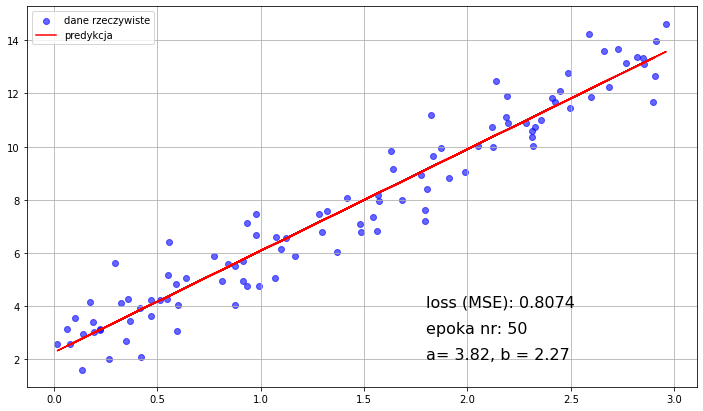

In [14]:
#wizualizacja procesu szukania najlepszych wartości parametrów a i b
for i in range(0,51):
        a,b, MSE = gradient_descent(X, y, 0.1, i)
        y_pred = a * X + b
        plt.figure(figsize=(12, 7))
        plt.scatter(X,y ,c = 'blue', alpha = 0.6, label = 'dane rzeczywiste')
        plt.plot(X, y_pred, c = 'red',label=  'predykcja')
        plt.legend()
        plt.text(1.8, 4, f'loss (MSE): {round(MSE, 4)}', fontsize=16)
        plt.text(1.8, 3, f'epoka nr: {i}', fontsize=16)
        plt.text(1.8, 2, f'a= {round(a,2)}, b = {round(b,2)}', fontsize=16)
        plt.grid()
        plt.show()
        time.sleep(0.2)
        clear_output(wait = True)
        

In [15]:
history = []
for i in range(0,50):
        a,b, MSE = gradient_descent(X, y, 0.02, i)
        history.append((a,b,MSE))

df = pd.DataFrame(history, columns=['a', 'b', 'MSE'])
frames = []
 
# Tworzenie klatek animacji
for i in range(1, len(df) + 1):
    frame_data = df.iloc[:i]  # Stopniowe dodawanie punktów
    frames.append(go.Frame(
        data=[go.Scatter3d(
            x=frame_data['a'],
            y=frame_data['b'],
            z=frame_data['MSE'],
            mode='markers+lines',
            marker=dict(size=7, color=frame_data['MSE'], colorscale='rainbow')
        )],
    ))
 
# Tworzenie wykresu
fig = go.Figure(
    data=[go.Scatter3d(x=[], y=[], z=[], mode='markers', surfaceaxis = -1,marker=dict(size=8))],
    layout=go.Layout(
        title="Proces uczenia regresji liniowej",
        scene=dict(xaxis_title="a", yaxis_title="b", zaxis_title="MSE", 
                   xaxis_range=[2,4],  yaxis_range=[-1,3],zaxis_range=[-1,15]),
        updatemenus=[{
            "buttons": [
                {"args": [None, {"frame": {"duration": 100, "redraw": True}, "fromcurrent": True}],
                 "label": "Odtwórz", "method": "animate"},
                {"args": [[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate", "transition": {"duration": 0}}],
                 "label": "Pauza", "method": "animate"}
            ],
            "direction": "up",
            "showactive": False,
            "type": "buttons"
        }]
    ),
    frames=frames
)

fig.update_layout( autosize=False,
                  width=1000, height=650,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()


### Implementacje z wykorzstaniem biblioteki SKLEARN

### SGD - stochastyczny spadek wzdłuż gradientu (ang. stochasstic gradient descent)

w porównaniu do gradientu prostego, który wykorzystuje pełny zbiór danych do obliczania gradientu, SGD wybiera losową próbkę danych, co sprawia, że algorytm staje się szybszy, ale też bardziej losowy nie schodząc w kierunku minimum a oscylując wokół minimum

In [18]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=500, tol=1e-5, penalty=None, eta0=0.1,
                       n_iter_no_change=100, random_state=42)
sgd.fit(X, y.ravel())  # y.ravel() - "spłaszczenie" tablicy do  1 wymiaru

SGDRegressor(eta0=0.1, max_iter=500, n_iter_no_change=100, penalty=None,
             random_state=42, tol=1e-05)

#### porównanie wyników gradientu prostego i SGD  przy liczbie iteracji 500 i l_rate 0.1 oraz równania normalnego

In [19]:
gp = gradient_descent(X, y, 0.1,500)

data = {'a': [gp[0],sgd.coef_[0],O[1][0] ],
         'b':[ gp[1],sgd.intercept_[0],O[0][0]], 
        'MSE' : [loss_function(gp[0], gp[1]), loss_function(sgd.coef_,sgd.intercept_),
                loss_function(O[1][0],O[0][0])
                ]
       }
df_summary = pd.DataFrame(data, columns = ['a','b','MSE'], 
                          index =['gradient_prosty', 'SGD', 'równanie normalne'])
df_summary

,a,b,MSE
gradient_prosty,3.948405,2.174780,0.974968
SGD,3.944781,2.193061,0.975146
równanie normalne,3.948405,2.174780,0.974968
